## INFORME DE RESULTADOS

### Arquitectura de datos y arquetipo de la aplicación

Se desarrolló una ETL siguiendo una estructura modular utilizando como lenguaje de programación Python y para el procesamiento de datos pandas, igualmente se implementó los módulos de observabilidad para poder visualizar en que parte de la ejecución de la ETL se encontraba, se utilizó el paradigma de POO siendo la clase principal ETL donde se define la estructura y los métodos extract() donde se obtienen los datos desde el excel que contiene las disitintas tablas (film, inventory, rental, customer, store), en el método transform() se hacen las respectivas funciones para hacer el proceso de limpieza como eliminar espacios en las columnas, conversión de datos con caracteres especiales a tipo numérico, reemplazo o eliminación de valores nulos y la conversión de las fechas a formato datatime para corregir el valor a tipo fecha si es el caso y por último load() que guarda los datos ya procesados y con el respectivo proceso de limpieza a un archivo csv y posteriormente la clase ETL que hereda de ABC, crea el método abstracto lo que obliga a cada una de las subclases (film, inventory, rental, customer, store) a implementar las transformaciones, por lo tanto, se ve implementado el principio SOLID porque con la herencia se evita el código repetitivo y ya que transform sería un método abstracto se asegura que cada ETL lo implemente dependiendo de sus condiciones. 

### Análisis exploratorio de datos

Tras realizar el proceso de limpieza de los datos se hicieron algunos cambios en las columnas de film como release_year, rental_rate, replacement_cost, num_voted_users que los números tenían caracteres especiales, por ende, estos fueron convertidos a formato numérico, en la tabla inventory en la columna store_id algunos registros tenían igualmente caracteres especiales entonces se utilizó nuevamente para que no lo almacenara como texto, por ende, se hizo el cambio pertinente a tipo numérico. En la tabla rental la columna return_date tenía algunos registros como NULL, por lo tanto esos fueron eliminados de la tabla. En la tabla customer no se eliminaron los registros de la columna customer_id_old ni segment porque serían muchos registros borrados, además finalizando se tiene información de esas dos columnas, por lo tanto, se tomó la decisión de dejarlas. 

# PREGUNTAS DE NEGOCIO

In [1]:
#importar librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
rental_df = pd.read_csv("rental_cleaned.csv", parse_dates=["rental_date"])
film_df = pd.read_csv("film_cleaned.csv")

C:\Users\Lau\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lau\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


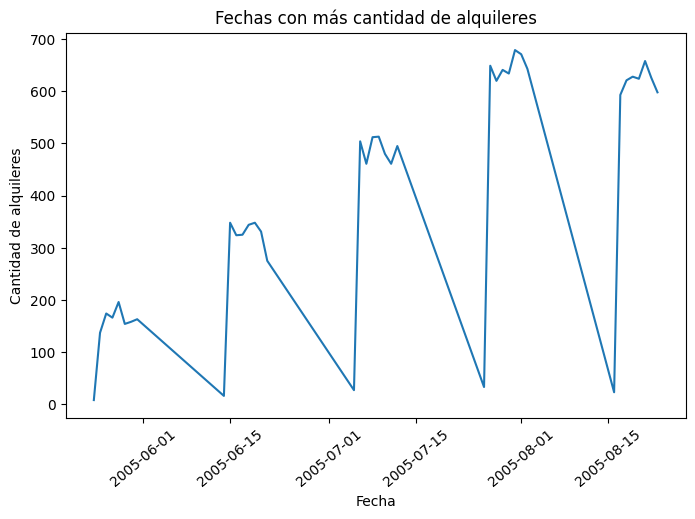

In [2]:
#Pregunta 1
#¿Cuáles son las fechas con mayor cantidad de alquileres?
rental_counts = rental_df["rental_date"].dt.date.value_counts().sort_index()
plt.figure(figsize=(8, 5))
sns.lineplot(x=rental_counts.index, y=rental_counts.values)
plt.xticks(rotation=40)
plt.xlabel("Fecha")
plt.ylabel("Cantidad de alquileres")
plt.title("Fechas con más cantidad de alquileres")
plt.show()

#Según la gráfica de línea se puede concluir que la fecha con más alquileres es entre el 1 y el 15 de agosto de 2005 teniendo 
# aproximadamente mas de 600 alquileres

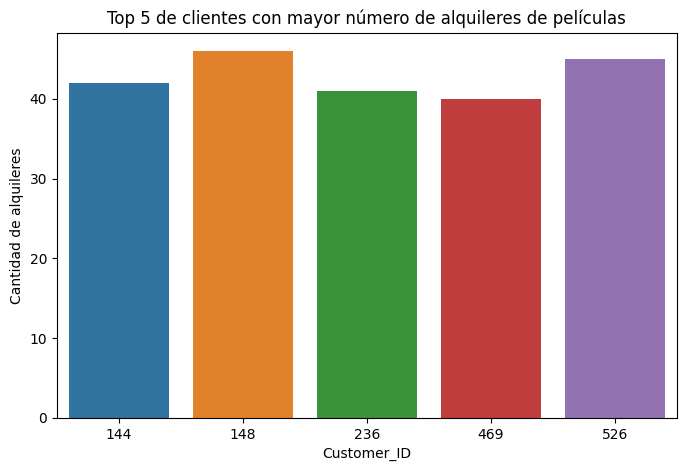

In [3]:
#Pregunta 2
#¿Cuáles son los clientes con mayor número de alquileres?
top_customers = rental_df["customer_id"].value_counts().head(5)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_customers.index, y=top_customers.values)
plt.xlabel("Customer_ID")
plt.ylabel("Cantidad de alquileres")
plt.title("Top 5 de clientes con mayor número de alquileres de películas")
plt.show()

#Se puede concluir que según la gráfica el mayor número de alquileres lo tiene el cliente con el ID 148 con más de 40 
# alquileres aproximadamente

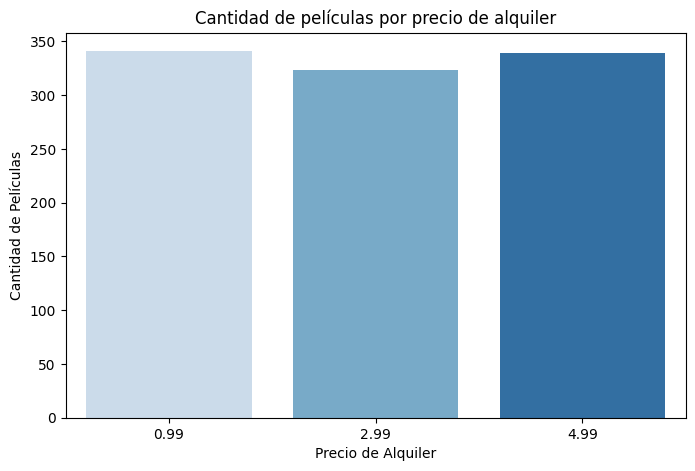

In [4]:
#Pregunta 3
#¿Cuántas películas hay por cada precio de alquiler?
price_counts = film_df["rental_rate"].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=price_counts.index, y=price_counts.values, palette="Blues")
plt.xlabel("Precio de Alquiler")
plt.ylabel("Cantidad de Películas")
plt.title("Cantidad de películas por precio de alquiler")
plt.show()


#Se puede analizar del gráfico de barras que existen 3 precios de alquiler y que los precios más comunes son 0.99 y 4.99 
# con más de 300 películas aproximadamente  

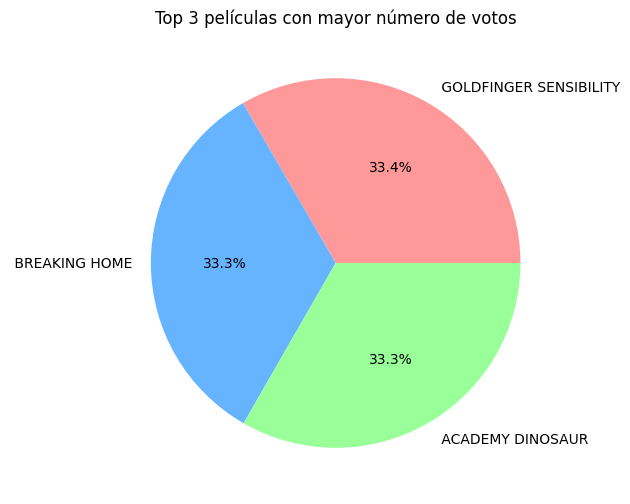

In [5]:
#Pregunta 4
#¿Cuáles son las 3 películas con mayor número de votos? 
top_rated = film_df.sort_values(by="num_voted_users", ascending=False).head(3)
plt.figure(figsize=(8, 6))
plt.pie(top_rated["num_voted_users"], labels=top_rated["title"], autopct="%1.1f%%", colors=["#ff9999","#66b3ff","#99ff99"])
plt.title("Top 3 películas con mayor número de votos")
plt.show()

#Se puede concluir que la película con mayor número de votos es GOLDFINGER SENSIBILTY con un 33.4% de la votación 

In [6]:
#Pregunta 5
#¿Cuál es el precio promedio de alquiler de las películas?
avg_rental_rate = film_df["rental_rate"].mean()
print(f"Precio promedio de alquiler es: ${avg_rental_rate:.2f}")

Precio promedio de alquiler es: $2.99


### CONCLUSIONES 

- Hacer una ETL usando el principio SOLID y utilizando estructura modular permite que el código se vea más estructurado, limpio y con facilidad de futuras modificaciones. 
- Es importante dar prioridad a la transformación y limpieza de datos en primera instancia para evitar errores futuros y tener dataframes estructurados y de esta manera quitar la información irrelevante. 
- Cuando se hace todo el proceso de la ETL ya con los datos transformados y listos para generar informes se pueden generar ciertos reportes con información clave para el negocio por medio de visualizaciones para dar respuesta a dichas preguntas de forma más interactiva. 